<a href="https://colab.research.google.com/github/FPALMAG/Ejemplos/blob/main/Modelacion_Financiera_CD_451_300525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Modelacion financiera

### Calculo del Valor Presente de Flujos de Caja Uniformes

### Primer enfoque

In [ ]:
# Definimos los parametros claves para el calculo del Valor Presente
cf=[100,100,100,100,100] # Definimos el flujo de caja como una lista
r=0.10 # Asignamos el valor de 10% a la variable r (tasa de descuento)

In [ ]:
len(cf)

5

In [ ]:
range(0,len(cf))

range(0, 5)

In [ ]:
n=list(range(1,len(cf)+1))
print(n)

[1, 2, 3, 4, 5]


In [ ]:
# Recordamos sumas parciales
a=10
print(a)
a+=5
print(a)
a+=7
print(a)

10
15
22


In [ ]:
cf[0]

100

In [ ]:
1+r

1.1

In [ ]:
for i in range(0,len(cf)):
    print(i)

0
1
2
3
4


In [ ]:
pv=0
for i in range(0,len(cf)):
    pv+=cf[i]/((1+r)**(1+i))
    print(pv)
print(f'El valor presente es: {pv:.1f}')

90.9090909090909
173.55371900826447
248.68519909842223
316.98654463492926
379.07867694084473
El valor presente es: 379.1


### Segundo enfoque

In [ ]:
cf2=[0,100,100,100,100,100]
pv=0
for i in range(0,len(cf2)):
    pv+=cf2[i]/((1+r)**(i))
    print(pv)
print(f'El valor presente es: {pv:.1f}')


0.0
90.9090909090909
173.55371900826447
248.68519909842223
316.98654463492926
379.07867694084473
El valor presente es: 379.1


In [ ]:
# Ejercicio: calcule el valor presente del flujo de caja cf1
cf1=[100,200,300,400,500]
r1=0.10

In [ ]:
pv1=0
for i in range(0,len(cf1)):
    pv1+=cf1[i]/((1+r1)**(1+i))
    print(pv1)
print(f'El valor presente es: {pv1:.1f}')

90.9090909090909
256.198347107438
481.59278737791124
754.7981695239395
1065.258831053517
El valor presente es: 1065.3


### Calculo del Valor Presente de Flujos de Caja Uniformes

### Utilizando la libreria pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cf_dict={'CF':[0,100,100,100,100,100]} # Creando el CF como un diccionario
cf_df=pd.DataFrame(cf_dict)
cf_df

,CF
0,0
1,100
2,100
3,100
4,100
5,100


In [ ]:
cf_df['DF']=1/((1+r)**(cf_df.index))
cf_df

,CF,DF
0,0,1.000000
1,100,0.909091
2,100,0.826446
3,100,0.751315
4,100,0.683013
5,100,0.620921


In [ ]:
cf_df['PV']=cf_df['CF']*cf_df['DF']
cf_df

,CF,DF,PV
0,0,1.000000,0.000000
1,100,0.909091,90.909091
2,100,0.826446,82.644628
3,100,0.751315,75.131480
4,100,0.683013,68.301346
5,100,0.620921,62.092132


In [ ]:
cf_df['PV'].sum()

np.float64(379.07867694084473)

In [ ]:
print(f'El valor presente del flujo de caja es: USD {cf_df["PV"].sum():.1f}')

El valor presente del flujo de caja es: USD 379.1


### Calculo del Valor Presente Neto

In [ ]:
vpn_dict={'CF':[-250,100,100,100,100,100]} # Creando el CF como un diccionario
vpn_df=pd.DataFrame(vpn_dict)
vpn_df

,CF
0,-250
1,100
2,100
3,100
4,100
5,100


In [ ]:
vpn_df['DF']=1/((1+r)**(cf_df.index))
vpn_df

,CF,DF
0,-250,1.000000
1,100,0.909091
2,100,0.826446
3,100,0.751315
4,100,0.683013
5,100,0.620921


In [ ]:
vpn_df['PV']=vpn_df['CF']*vpn_df['DF']
vpn_df

,CF,DF,PV
0,-250,1.000000,-250.000000
1,100,0.909091,90.909091
2,100,0.826446,82.644628
3,100,0.751315,75.131480
4,100,0.683013,68.301346
5,100,0.620921,62.092132


In [ ]:
print(f'El valor presente neto del flujo de caja es USD {vpn_df["PV"].sum():.1f}')
if vpn_df["PV"].sum()>0:
    print('Se acepta el proyecto')
elif vpn_df["PV"].sum()==0:
    print('No se acepta ni rechaza el proyecto')
else:
    print('Se rechaza el proyecto')

El valor presente neto del flujo de caja es USD 129.1
Se acepta el proyecto


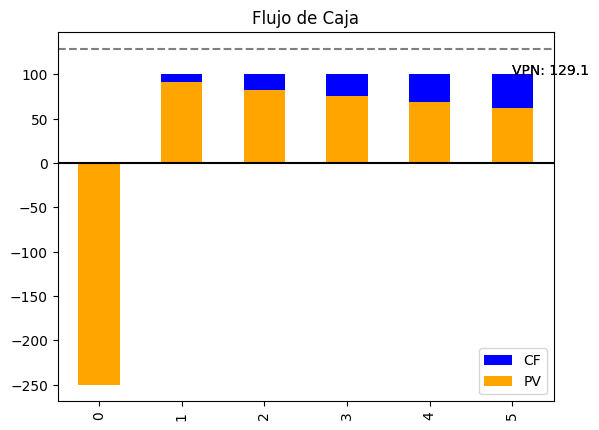

In [ ]:
vpn=vpn_df['PV'].sum()
vpn_df['CF'].plot(kind='bar',label='CF',color='blue')
plt.text(vpn_df.index[-1],vpn_df['CF'].iloc[-1],f'VPN: {vpn:.1f}')
vpn_df['PV'].plot(kind='bar',label='PV',color='orange')
plt.text(vpn_df.index[-1],vpn_df['CF'].iloc[-1],f'VPN: {vpn:.1f}')
plt.legend()
plt.title('Flujo de Caja')
plt.axhline(0,color='black')
plt.axhline(vpn_df['PV'].sum(),color='grey',linestyle='--',label='VPN')
plt.show()

### Calculo de la Tasa interna de retorno

In [ ]:
!pip install numpy-financial

In [ ]:
import numpy_financial as npf

In [ ]:
cf_irr=[-250,100,100,100,100,100]
irr=npf.irr(cf_irr)
print(f'La tasa interna de retorno es: {irr:.1%}')
if irr>r:
    print('Se acepta el proyecto')
elif irr==r:
    print('No se acepta ni rechaza el proyecto')
else:
    print('Se rechaza el proyecto')

La tasa interna de retorno es: 28.6%
Se acepta el proyecto


### Calculo del VPN con fechas especificas

In [ ]:
cf_dict_vpn_fechas={'Fecha':['2024-12-31','2025-12-31','2026-12-31','2027-12-31','2028-12-31','2029-12-31'],
                    'CF':[-250,100,100,100,100,100]}
cf_df_vpn_fechas=pd.DataFrame(cf_dict_vpn_fechas)
cf_df_vpn_fechas

,Fecha,CF
0,2024-12-31,-250
1,2025-12-31,100
2,2026-12-31,100
3,2027-12-31,100
4,2028-12-31,100
5,2029-12-31,100


In [ ]:
cf_df_vpn_fechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fecha   6 non-null      object
 1   CF      6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


In [ ]:
cf_df_vpn_fechas['Fecha']=pd.to_datetime(cf_df_vpn_fechas['Fecha'])
cf_df_vpn_fechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   6 non-null      datetime64[ns]
 1   CF      6 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 228.0 bytes


In [ ]:
fecha_de_inicio=pd.to_datetime('2024-12-31')
fecha_de_inicio

Timestamp('2024-12-31 00:00:00')

In [ ]:
(cf_df_vpn_fechas['Fecha']-fecha_de_inicio).dt.days/360

,Fecha
0,0.000000
1,1.013889
2,2.027778
3,3.041667
4,4.058333
5,5.072222


In [ ]:
cf_df_vpn_fechas['periodo']=(cf_df_vpn_fechas['Fecha']-fecha_de_inicio).dt.days/360
cf_df_vpn_fechas

,Fecha,CF,periodo
0,2024-12-31,-250,0.000000
1,2025-12-31,100,1.013889
2,2026-12-31,100,2.027778
3,2027-12-31,100,3.041667
4,2028-12-31,100,4.058333
5,2029-12-31,100,5.072222


In [ ]:
cf_df_vpn_fechas['DF']=1/((1+r)**cf_df_vpn_fechas['periodo'])
cf_df_vpn_fechas

,Fecha,CF,periodo,DF
0,2024-12-31,-250,0.000000,1.000000
1,2025-12-31,100,1.013889,0.907888
2,2026-12-31,100,2.027778,0.824261
3,2027-12-31,100,3.041667,0.748337
4,2028-12-31,100,4.058333,0.679227
5,2029-12-31,100,5.072222,0.616662


In [ ]:
cf_df_vpn_fechas['PV']=cf_df_vpn_fechas['CF']*cf_df_vpn_fechas['DF']
cf_df_vpn_fechas

,Fecha,CF,periodo,DF,PV
0,2024-12-31,-250,0.000000,1.000000,-250.000000
1,2025-12-31,100,1.013889,0.907888,90.788829
2,2026-12-31,100,2.027778,0.824261,82.426115
3,2027-12-31,100,3.041667,0.748337,74.833705
4,2028-12-31,100,4.058333,0.679227,67.922660
5,2029-12-31,100,5.072222,0.616662,61.666188


In [ ]:
print(f'El Valor Presente Neto considerando fechas especificas es: USD {cf_df_vpn_fechas["PV"].sum():.1f}')

El Valor Presente Neto considerando fechas especificas es: USD 127.6


### Calculo de Valor Presente de una Anualidad Finita

In [ ]:
cf_dict_an={'CF':[0,1000,1000,1000,1000,1000]}
cf_df_an=pd.DataFrame(cf_dict_an)
r_an=0.12
cf_df_an

,CF
0,0
1,1000
2,1000
3,1000
4,1000
5,1000


In [ ]:
cf_df_an['DF']=1/((1+r_an)**(cf_df_an.index))
cf_df_an

,CF,DF
0,0,1.000000
1,1000,0.892857
2,1000,0.797194
3,1000,0.711780
4,1000,0.635518
5,1000,0.567427


In [ ]:
cf_df_an['PV']=cf_df_an['CF']*cf_df_an['DF']
cf_df_an

,CF,DF,PV
0,0,1.000000,0.000000
1,1000,0.892857,892.857143
2,1000,0.797194,797.193878
3,1000,0.711780,711.780248
4,1000,0.635518,635.518078
5,1000,0.567427,567.426856


In [ ]:
print(f'El Valor Presente de la Anualidad Finita es: USD {cf_df_an["PV"].sum():.1f}')

El Valor Presente de la Anualidad Finita es: USD 3604.8


### Calculando el Valor Presente de una Anualidad Finita y Creciente

In [ ]:
cf_dict_an_fc={'CF':[0,1000,1000,1000,1000,1000]}
cf_df_an_fc=pd.DataFrame(cf_dict_an_fc)
r_an_fc=0.12
g=0.06
cf_df_an_fc

,CF
0,0
1,1000
2,1000
3,1000
4,1000
5,1000


In [ ]:
cf_df_an_fc['CF_Adj']=cf_df_an_fc['CF']*(1+g)**(cf_df_an_fc.index-1)
cf_df_an_fc

,CF,CF_Adj
0,0,0.00000
1,1000,1000.00000
2,1000,1060.00000
3,1000,1123.60000
4,1000,1191.01600
5,1000,1262.47696


In [ ]:
cf_df_an_fc['DF']=1/((1+r_an_fc)**(cf_df_an_fc.index))
cf_df_an_fc

,CF,CF_Adj,DF
0,0,0.00000,1.000000
1,1000,1000.00000,0.892857
2,1000,1060.00000,0.797194
3,1000,1123.60000,0.711780
4,1000,1191.01600,0.635518
5,1000,1262.47696,0.567427


In [ ]:
cf_df_an_fc['PV']=cf_df_an_fc['CF_Adj']*cf_df_an_fc['DF']
cf_df_an_fc

,CF,CF_Adj,DF,PV
0,0,0.00000,1.000000,0.000000
1,1000,1000.00000,0.892857,892.857143
2,1000,1060.00000,0.797194,845.025510
3,1000,1123.60000,0.711780,799.756286
4,1000,1191.01600,0.635518,756.912200
5,1000,1262.47696,0.567427,716.363332


In [ ]:
print(f'El Valor Presente de la Anualidad Finita y Creciente es: USD {cf_df_an_fc["PV"].sum():.1f}')

El Valor Presente de la Anbualidad Finita y Creciente es: USD 4010.9


### Valor Presente de una Anualidad Infinita y Creciente

In [ ]:
an_inf=1000   # Asignando la variable an_inf al monto de la anualidad
r_an_inf=0.12 # Asignando a la variable r_an_inf la tasa de 12%
g_an_inf=0.06 # Creando la tasa de crecimiento de la anualidad: 6%

In [ ]:
print(f'El Valor Presente de la Anualidad Infinita es: USD {an_inf/(r_an-g_an_inf):.1f}')

El Valor Presente de la Anualidad Infinita es: USD 16666.7
